## Classification
Do the following in the iris dataset
1. Read the dataset to python environment
2. Do the necessary pre-processing steps
3. Find out which classification model gives the best result (try all the
classification algorithms discussed in the session)

In [22]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#loading the data
data = pd.read_excel("/content/iris (1).xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
# finding info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
#checking for null values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

It is found that there are missing values in SL,PW,PL columns

In [26]:
# examining the skewness of the dataset
data.SL.skew()

0.3068227108046868

In [27]:
data.SW.skew()

0.37781843718771746

In [28]:
data.PL.skew()

-0.2689053923783847

It is found that datset is skewed so using median imputation to fill na values

In [29]:
for item in ['SL','SW','PL']:
  data[item].fillna(data[item].median(), inplace=True)

#checking for the null values again
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

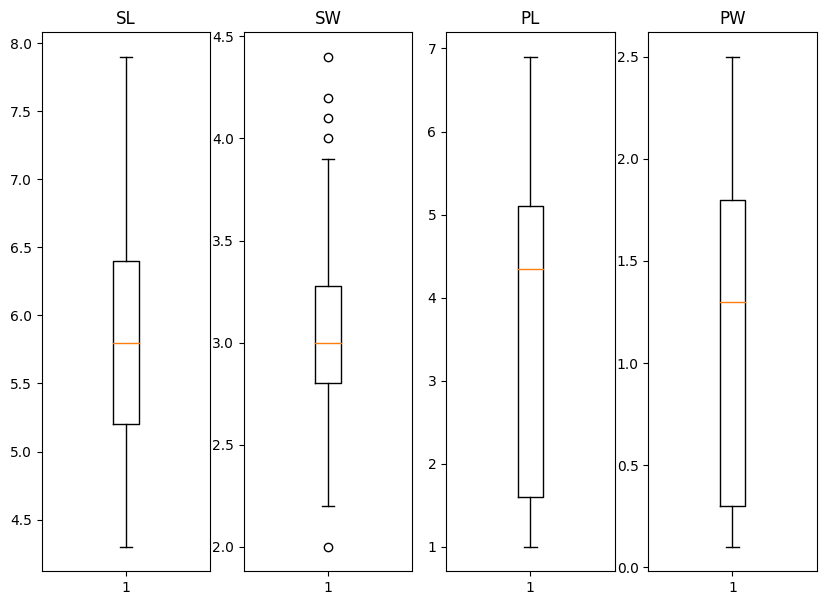

In [30]:
#checking for outliers
def plot_outliers():
  '''
  Plots the box plots to find the outliers in the dataset'''
  fig,ax = plt.subplots(nrows=1, ncols=4, figsize=(10,7))
  counter=0
  for item in data.drop('Classification', axis=1):
    ax[counter].boxplot(data[item])
    ax[counter].set_title(item)
    counter+=1
  plt.show()

plot_outliers()

There are outliers in the SW column

In [31]:
# finding the outlier indices using zscore method
from scipy.stats import zscore
z_scores = zscore(data.SW)

#defining the zscore threshold
threshold =2
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
outlier_indices

array([  5,  14,  15,  16,  32,  33,  60,  62,  68, 119])

In [32]:
data.iloc[outlier_indices]

,SL,SW,PL,PW,Classification
5,5.4,3.9,1.7,0.4,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor
62,6.0,2.2,4.0,1.0,Iris-versicolor
68,6.2,2.2,4.5,1.5,Iris-versicolor
119,6.0,2.2,5.0,1.5,Iris-virginica


Making outliers as is beacuse we will be using models which are immune to outliers

In [33]:
# Examining the unique categories
data.Classification.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [34]:
#Label encoding the target column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
#fitting the label encoder on the Classification column of the data
data.Classification = label_encoder.fit_transform(data.Classification)
#checking the results
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [35]:
# checking the results of label encoding
data.Classification.value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

In [36]:
#splitting the data into target and features
X = data.drop('Classification', axis=1)
y = data.Classification

In [49]:
#scaling data
scaled_X = pd.DataFrame()
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_data, columns=X.columns)
scaled_X.head()

,SL,SW,PL,PW
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.416667,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [50]:
# splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X,y,test_size=0.2, random_state=42)
#Examining the shape of the sets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [51]:
# Trying out a simple classification model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)


LogisticRegression()

In [52]:
lr_model.score(X_test,y_test)

0.9666666666666667

Accuracy score : 0.9666666666666667
Precison score : 0.9694444444444444
Recall score : 0.9666666666666667


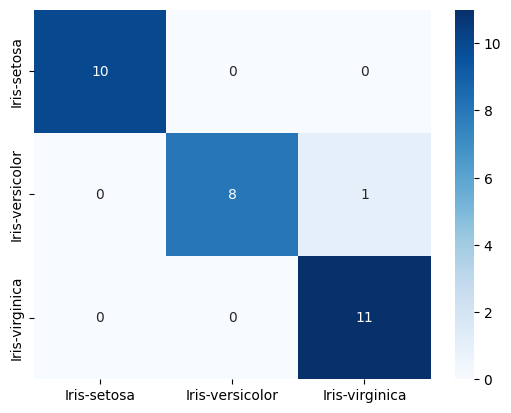

In [61]:
#making some predictions on the model and evaluating the metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
def evaluate_model(model,x_=X_test, y_=y_test):
  '''
  Evaluate the various metrics of the classification model
  Takes model, X,y as input'''
  class_names=['Iris-setosa','Iris-versicolor','Iris-virginica']
  y_pred = model.predict(x_)
  print(f"Accuracy score : {accuracy_score(y_,y_pred)}")
  print(f"Precison score : {precision_score(y_,y_pred, average='weighted')}")
  print(f"Recall score : {recall_score(y_,y_pred,average='weighted')}")
  #creating a df from the confusion matrix
  conf_df = pd.DataFrame(confusion_matrix(y_,y_pred), index=class_names, columns=class_names)
  #plotting the df as heatmap
  sns.heatmap(conf_df, cmap="Blues",annot=True, fmt='d');


#evaluating the logistic regression model
evaluate_model(lr_model)

Accuracy score : 0.9666666666666667
Precison score : 0.9694444444444444
Recall score : 0.9666666666666667


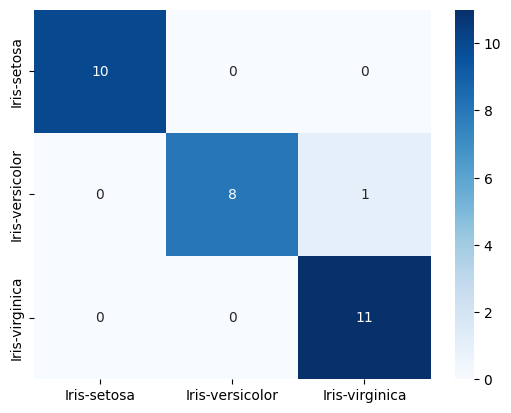

In [62]:
#trying the KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
# initializing the model with neighbors as 3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

#fitting the model
knn_classifier.fit(X_train, y_train)
evaluate_model(knn_classifier)

Accuracy score : 0.9666666666666667
Precison score : 0.9694444444444444
Recall score : 0.9666666666666667


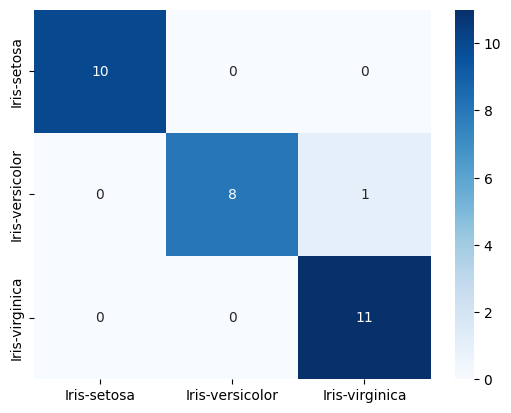

In [63]:
# Trying with the SVC
from sklearn.svm import SVC
# initialising the model with default params
sv_classifier = SVC()
#fitting the model
sv_classifier.fit(X_train, y_train)

#evaluating the model
evaluate_model(sv_classifier)

Accuracy score : 1.0
Precison score : 1.0
Recall score : 1.0


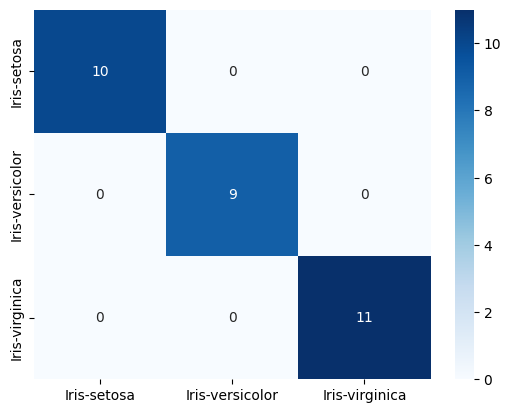

In [64]:
# Trying the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
#initialising the model with default params
dt_clf = DecisionTreeClassifier()
#fitting the model
dt_clf.fit(X_train, y_train)
#evaluating the model
evaluate_model(dt_clf)

Accuracy score : 1.0
Precison score : 1.0
Recall score : 1.0


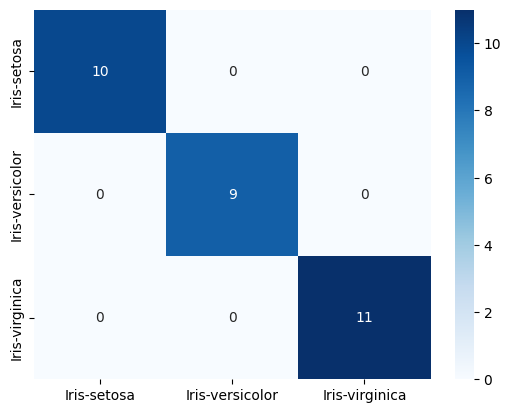

In [65]:
# Trying with the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# instantiating the model instance with default params
rf_clf = RandomForestClassifier()
# fitting the model
rf_clf.fit(X_train, y_train)

#evaluating the model
evaluate_model(rf_clf)

It is found that :
> Random Forest Classifier and Decision Tree Classifier has provided the best result for every metric (Precision, Recall, Accuracy). Hence both are considered to be optimal models. They are also immune to outliers.
